### **MNIST set is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. It is often used for benchmarking machine learning algorithms.**

### **MNIST is short for Modified National Institute of Standards and Technology database.It contains a collection of 70,000, 28 x 28 images of handwritten digits from 0 to 9.The dataset is already divided into training and testing sets.**

### **Kaggle JSON path**

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/'

### **API from kaggle**

In [2]:
!kaggle datasets download -d saijananim/ibm-mnist-dataset-new

 72% 11.0M/15.2M [00:00<00:00, 53.3MB/s]
100% 15.2M/15.2M [00:00<00:00, 66.8MB/s]


### **Importing the libraries**

In [120]:
import pandas as pd
import numpy as np
from keras import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
%matplotlib inline
from keras.datasets import mnist    
from keras.models import Sequential  
from keras.layers.core import Dense, Dropout, Activation,Flatten 
from keras.utils import np_utils
import random 
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import SGD
import keras
import keras.utils
from keras import utils as np_utils
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing import image



### **Loading the dataset from keras**

In [5]:
df=mnist.load_data()

In [6]:
df

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

### **Training and Testing Datasets**

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


### **Determining the Shape of the dataset**

In [20]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


### **Showing the Sample Images**

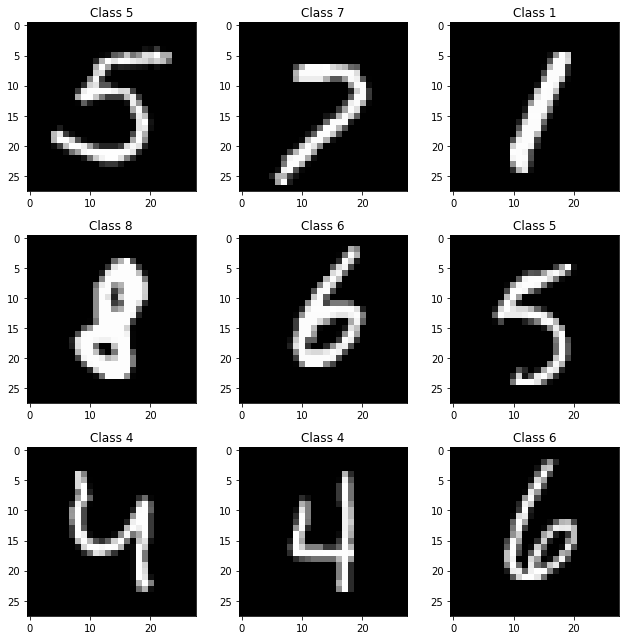

In [35]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

### **Printing the matrix**

In [31]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

   
matprint(X_train[num])

0  0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0    0    0    0   11   51  113  193  193   51    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0    0    0   41  213  252  253  252  253  192    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0    0  113  253  224  122   41   82  254  253   82   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0   41  233  212   20    0    0    0  172  252  203   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0  102  2

The label value is  [7 2 1 ... 4 5 6]


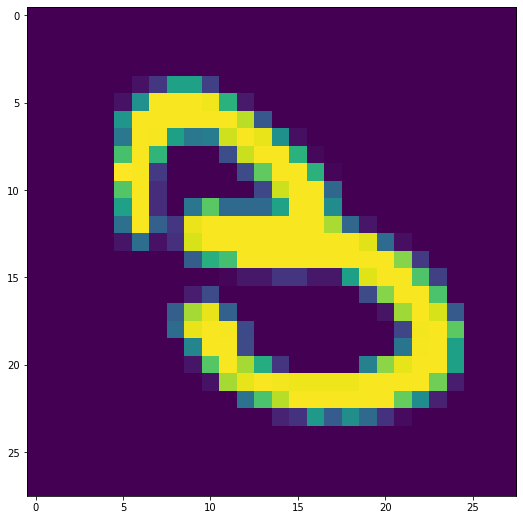

In [32]:
print("The label value is ",y_test)
plt.imshow(X_test[18])

The label value is  [7 2 1 ... 4 5 6]


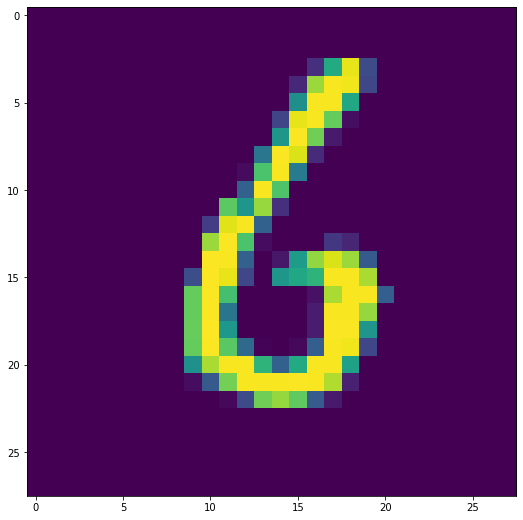

In [34]:
print("The label value is ",y_test)
plt.imshow(X_test[50])

In [36]:
input_shape=(28,28,1)
output_class=10

### **CNN Model Building**

In [41]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=input_shape ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(output_class, activation = 'softmax'))

In [109]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [93]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

## **Training the Model**

In [110]:
model_history = model.fit(x=X_train, y=y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 113s 60ms/step - loss: 0.3155 - accuracy: 0.9185 - val_loss: 0.0984 - val_accuracy: 0.9694
Epoch 2/30
1875/1875 [==============================] - 110s 59ms/step - loss: 0.1004 - accuracy: 0.9711 - val_loss: 0.0869 - val_accuracy: 0.9760
Epoch 3/30
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0789 - accuracy: 0.9768 - val_loss: 0.0728 - val_accuracy: 0.9789
Epoch 4/30
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0690 - accuracy: 0.9793 - val_loss: 0.0724 - val_accuracy: 0.9782
Epoch 5/30
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0592 - accuracy: 0.9821 - val_loss: 0.0691 - val_accuracy: 0.9802
Epoch 6/30
1875/1875 [==============================] - 112s 59ms/step - loss: 0.0529 - accuracy: 0.9840 - val_loss: 0.0730 - val_accuracy: 0.9776
Epoch 7/30
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0475 - accuracy: 0.9860 - val_loss: 0

## **Saving the model**

In [111]:
 model.save('Handwritten digit.h5')

## **Testing the model**

In [114]:
img=image.load_img('/content/Number one.jpg',target_size=(64,64))

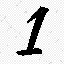

In [115]:
img

## **Converting image to array**

In [116]:
x=image.img_to_array(img)
x

array([[[239., 239., 239.],
        [255., 255., 255.],
        [238., 238., 238.],
        ...,
        [238., 238., 238.],
        [255., 255., 255.],
        [238., 238., 238.]],

       [[255., 255., 255.],
        [239., 239., 239.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [238., 238., 238.],
        [255., 255., 255.]],

       [[238., 238., 238.],
        [255., 255., 255.],
        [238., 238., 238.],
        ...,
        [238., 238., 238.],
        [255., 255., 255.],
        [238., 238., 238.]],

       ...,

       [[238., 238., 238.],
        [255., 255., 255.],
        [238., 238., 238.],
        ...,
        [204., 204., 204.],
        [255., 255., 255.],
        [238., 238., 238.]],

       [[255., 255., 255.],
        [238., 238., 238.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [214., 214., 214.],
        [255., 255., 255.]],

       [[238., 238., 238.],
        [255., 255., 255.],
        [238., 2

In [117]:
np.expand_dims(x,axis=0)

array([[[[239., 239., 239.],
         [255., 255., 255.],
         [238., 238., 238.],
         ...,
         [238., 238., 238.],
         [255., 255., 255.],
         [238., 238., 238.]],

        [[255., 255., 255.],
         [239., 239., 239.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [238., 238., 238.],
         [255., 255., 255.]],

        [[238., 238., 238.],
         [255., 255., 255.],
         [238., 238., 238.],
         ...,
         [238., 238., 238.],
         [255., 255., 255.],
         [238., 238., 238.]],

        ...,

        [[238., 238., 238.],
         [255., 255., 255.],
         [238., 238., 238.],
         ...,
         [204., 204., 204.],
         [255., 255., 255.],
         [238., 238., 238.]],

        [[255., 255., 255.],
         [238., 238., 238.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [214., 214., 214.],
         [255., 255., 255.]],

        [[238., 238., 238.],
       

## **Evaluating the Model**

In [124]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.12947456538677216, 0.9835000038146973]


In [125]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 89ms/step
[[0.00000000e+00 6.00429547e-33 2.48660089e-20 1.84624683e-31
  4.30453450e-34 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 3.05325083e-38]
 [6.29198003e-29 2.87600177e-21 1.00000000e+00 4.24947389e-25
  0.00000000e+00 0.00000000e+00 2.07282964e-33 2.65134585e-22
  0.00000000e+00 0.00000000e+00]
 [1.62689003e-25 1.00000000e+00 5.96480707e-16 1.97953362e-30
  6.85287730e-20 2.44052635e-19 4.29699972e-21 6.35973049e-17
  4.28962419e-16 3.91479681e-26]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.99728950e-31 2.55093206e-22 0.00000000e+00
  1.62420244e-28 1.37313325e-33]]


### **Test Accuracy = 98.35%**